In [47]:
from keras.applications import Xception
conv_base = Xception(weights='imagenet', include_top=False, input_shape=(200, 200, 3))

In [48]:
conv_base.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_9 (InputLayer)            (None, 200, 200, 3)  0                                            
__________________________________________________________________________________________________
block1_conv1 (Conv2D)           (None, 99, 99, 32)   864         input_9[0][0]                    
__________________________________________________________________________________________________
block1_conv1_bn (BatchNormaliza (None, 99, 99, 32)   128         block1_conv1[0][0]               
__________________________________________________________________________________________________
block1_conv1_act (Activation)   (None, 99, 99, 32)   0           block1_conv1_bn[0][0]            
__________________________________________________________________________________________________
block1_con

In [49]:
from keras import models
from keras import layers

model = models.Sequential()
model.add(conv_base)
model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
xception (Model)             (None, 7, 7, 2048)        20861480  
_________________________________________________________________
flatten_11 (Flatten)         (None, 100352)            0         
_________________________________________________________________
dense_17 (Dense)             (None, 256)               25690368  
_________________________________________________________________
dense_18 (Dense)             (None, 1)                 257       
Total params: 46,552,105
Trainable params: 46,497,577
Non-trainable params: 54,528
_________________________________________________________________


In [50]:
import os
base_dir = '/Users/l/Documents/MachineLearning/keras-playground/Substations'
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')
test_dir = os.path.join(base_dir, 'test')

In [51]:
from keras.preprocessing.image import ImageDataGenerator
from keras import optimizers
from keras import callbacks

train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=(0.2),
    zoom_range=(0.2),
    horizontal_flip=True,
    fill_mode='nearest'
)

validation_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(200, 200),
    batch_size=20,
    class_mode='binary'
)

validation_generator = validation_datagen.flow_from_directory(
    validation_dir,
    target_size=(200, 200),
    batch_size=20,
    class_mode='binary'
)

Found 400 images belonging to 2 classes.
Found 200 images belonging to 2 classes.


In [52]:
model.compile(loss='binary_crossentropy',
             optimizer=optimizers.RMSprop(lr=1e-5),
             metrics=['acc'])

history = model.fit_generator(
    train_generator,
    steps_per_epoch=20,
    epochs=50, 
    validation_data=validation_generator,
    validation_steps=10,
)

Epoch 1/50
20/20 [==============================] - 366s 18s/step - loss: 0.5025 - acc: 0.7825 - val_loss: 0.4127 - val_acc: 0.8600
Epoch 2/50
20/20 [==============================] - 373s 19s/step - loss: 0.3016 - acc: 0.8700 - val_loss: 0.3336 - val_acc: 0.8750
Epoch 3/50
20/20 [==============================] - 355s 18s/step - loss: 0.2056 - acc: 0.9250 - val_loss: 0.2494 - val_acc: 0.9250
Epoch 4/50
20/20 [==============================] - 368s 18s/step - loss: 0.2073 - acc: 0.9250 - val_loss: 0.2494 - val_acc: 0.8950
Epoch 5/50
20/20 [==============================] - 367s 18s/step - loss: 0.1470 - acc: 0.9475 - val_loss: 0.2231 - val_acc: 0.9050
Epoch 6/50
20/20 [==============================] - 356s 18s/step - loss: 0.2260 - acc: 0.9250 - val_loss: 0.1733 - val_acc: 0.9300
Epoch 7/50
20/20 [==============================] - 362s 18s/step - loss: 0.1462 - acc: 0.9450 - val_loss: 0.1444 - val_acc: 0.9600
Epoch 8/50
20/20 [==============================] - 355s 18s/step - loss: 0.

In [53]:
model.save('Xception_version1 200 * 200 Dense 256(no dropout+allFrozen).h5')

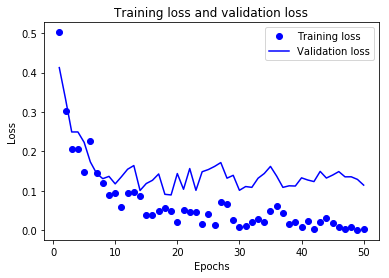

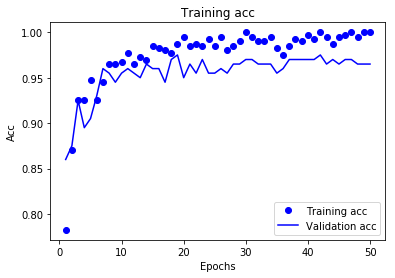

In [54]:
history_dict = model.history.history
history_dict.keys()

import matplotlib.pyplot as plt

train_loss = history_dict['loss']
validation_loss = history_dict['val_loss']

epochs = range(1, len(train_loss) +1)

plt.plot(epochs, train_loss, 'bo', label="Training loss")
plt.plot(epochs, validation_loss, 'b', label="Validation loss")
plt.title('Training loss and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


train_acc= history_dict['acc']
validation_acc= history_dict['val_acc']
epochs = range(1, len(train_acc) +1)

plt.plot(epochs, train_acc, 'bo', label="Training acc")
plt.plot(epochs, validation_acc, 'b', label="Validation acc")
plt.title('Training acc')
plt.xlabel('Epochs')
plt.ylabel('Acc')
plt.legend()
plt.show()